In [1]:
# Import dependencies
import os
import pandas as pd
import numpy as np
from scipy.stats import sem, linregress, f_oneway
from matplotlib import pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

C:\Users\winth\Anaconda3\envs\PythonData\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [9]:
# List of playlist names
playlists = ["todays_top_hits", "rap_caviar", "mint", "rock_this", "are_and_be",
             "viva_latino", "hot_country", "new_music_friday_malaysia",
             "viral_hits", "fresh_finds", "global_top_50", "united_states_top_50",
             "global_viral_50", "united_states_viral_50"]

# Initialize empty data frame
sentiment_df = pd.DataFrame()

# Iterate through playlists
for playlist in playlists:
    # Read in playlist .csv file
    print(f"Playlist: {playlist}")
    print("------------------------")
    pl_csv_path = f"../Data_Files/Play_Lists/{playlist}.csv"
    pl_csv = pd.read_csv(pl_csv_path)
    pl_csv = pl_csv.drop("Unnamed: 0", axis = 1)

    # Add columns for sentiment scoring
    pl_csv["compound"] = ""
    pl_csv["negative"] = ""
    pl_csv["neutral"] = ""
    pl_csv["positive"] = ""

    for index, row in pl_csv.iterrows():
        # Get path to lyrics file
        lyrics_path = pl_csv.loc[index, 'Lyrics Path']
        lyrics_path = lyrics_path[3:]  # This can be removed when Genius API script is updated

        # Open lyrics file, convert to list
        lyrics = pd.read_table(lyrics_path, names = ["Lyrics"])
        lyrics = lyrics["Lyrics"].values.tolist()

        # New list with entries starting with '[' removed
        lyrics = [lyric for lyric in lyrics if not lyric.startswith('[')]

        # Create a lyric frame with sentiment score for each line in each song
        print(f"Sentiment score for {pl_csv.loc[index, 'Track Name']} by {pl_csv.loc[index, 'Artist Name']}")

        # Initialize empty lists
        line = []
        compound = []
        neg = []
        neu = []
        pos = []

        # For each line of each song
        for lyric in lyrics:
            # Calculate sentiment score for the line
            ss = sid.polarity_scores(lyric)

            # Append scores to list
            line.append(lyric)
            compound.append(ss['compound'])
            neg.append(ss['neg'])
            neu.append(ss['neu'])
            pos.append(ss['pos'])

        # Create data frame with sentiment scores for each line
        lyric_frame = pd.DataFrame({"Line": line,
                                    "compound": compound,
                                    "negative": neg,
                                    "neutral": neu,
                                    "positive": pos})

        # Take means and store in data frame
        pl_csv.loc[index, 'compound'] = lyric_frame['compound'].mean()
        pl_csv.loc[index, 'negative'] = lyric_frame['negative'].mean()
        pl_csv.loc[index, 'neutral'] = lyric_frame['neutral'].mean()
        pl_csv.loc[index, 'positive'] = lyric_frame['positive'].mean()

    # Save .csv with data
    pl_csv.to_csv(f"../Data_Files/Play_Lists/{playlist}_SentimentScore.csv")

    # Append to full data frame
    sentiment_df = sentiment_df.append(pl_csv)
    print()

Playlist: todays_top_hits
------------------------
Sentiment score for Happier by Marshmello
Sentiment score for Eastside (with Halsey & Khalid) by benny blanco
Sentiment score for Be Alright by Dean Lewis
Sentiment score for Whenever (feat. Conor Maynard) by Kris Kross Amsterdam
Sentiment score for Promises (with Sam Smith) by Calvin Harris
Sentiment score for breathin by Ariana Grande
Sentiment score for Natural by Imagine Dragons
Sentiment score for No Brainer by DJ Khaled
Sentiment score for Lucky You (feat. Joyner Lucas) by Eminem
Sentiment score for Happy Now by Zedd
Sentiment score for Beautiful (feat. Camila Cabello) by Bazzi
Sentiment score for Thunderclouds with Sia, Diplo & Labrinth by Sia
Sentiment score for In My Mind by Dynoro
Sentiment score for Body by Loud Luxury
Sentiment score for Feels Like Summer by Childish Gambino
Sentiment score for Tie Me Down (with Elley Duhé) by Gryffin
Sentiment score for Girls Like You (feat. Cardi B) by Maroon 5
Sentiment score for Don't L

Sentiment score for Sunrise by ARTY
Sentiment score for Nothing Scares Me Anymore by Steve Angello
Sentiment score for Alone (Calvin Harris Remix) (Feat. Stefflon Don) by Halsey
Sentiment score for Flames - David Guetta Remix by David Guetta
Sentiment score for I Wanna Know by RL Grime
Sentiment score for Ultimatum - Edit by Disclosure
Sentiment score for Turn off the Lights (feat. Alexis Roberts) by Chris Lake
Sentiment score for Wake Me Up - Radio Edit by Avicii
Sentiment score for Real Life by Duke Dumont
Sentiment score for You Be Love (feat. Billy Raffoul) by Avicii

Playlist: rock_this
------------------------
Sentiment score for MANTRA by Bring Me The Horizon
Sentiment score for Forever & Ever More by Nothing But Thieves
Sentiment score for Natural by Imagine Dragons
Sentiment score for Jumpsuit by Twenty One Pilots
Sentiment score for The Dark Side by Muse
Sentiment score for Blood / / Water by grandson
Sentiment score for When The Curtain Falls by Greta Van Fleet
Sentiment sco

Sentiment score for Drowns The Whiskey (feat. Miranda Lambert) by Jason Aldean
Sentiment score for Good Together by James Barker Band
Sentiment score for She Got the Best of Me by Luke Combs
Sentiment score for Heaven by Kane Brown
Sentiment score for I Hate Love Songs by Kelsea Ballerini
Sentiment score for Best Shot by Jimmie Allen
Sentiment score for Downtown's Dead by Sam Hunt
Sentiment score for Never Comin Down by Keith Urban
Sentiment score for Leave Right Now by Thomas Rhett
Sentiment score for Born to Love You by LANCO
Sentiment score for Take Back Home Girl (Feat. Tori Kelly) by Chris Lane
Sentiment score for Drunk Me by Mitchell Tenpenny
Sentiment score for Eyes On You by Chase Rice
Sentiment score for Turnin' Me On by Blake Shelton
Sentiment score for Break Up in the End by Cole Swindell
Sentiment score for Life Changes by Thomas Rhett
Sentiment score for Take It From Me by Jordan Davis
Sentiment score for Night Shift by Jon Pardi
Sentiment score for Burning Man by Dierks B

Sentiment score for I Like It by Cardi B
Sentiment score for SAD! by XXXTENTACION
Sentiment score for Vaina Loca by Ozuna
Sentiment score for Body (feat. brando) by Loud Luxury
Sentiment score for Rise by Jonas Blue
Sentiment score for Better Now by Post Malone
Sentiment score for Solo (feat. Demi Lovato) by Clean Bandit
Sentiment score for BEBE by 6ix9ine
Sentiment score for Normal by Eminem
Sentiment score for Jackie Chan by Tiësto
Sentiment score for Youngblood by 5 Seconds of Summer
Sentiment score for Stepping Stone by Eminem
Sentiment score for Te Boté - Remix by Nio Garcia
Sentiment score for Moonlight by XXXTENTACION
Sentiment score for Nonstop by Drake
Sentiment score for One Kiss (with Dua Lipa) by Calvin Harris
Sentiment score for Natural by Imagine Dragons
Sentiment score for Venom - Music From The Motion Picture by Eminem
Sentiment score for Happy Now by Zedd
Sentiment score for Good Guy (feat. Jessie Reyez) by Eminem
Sentiment score for Beautiful (feat. Camila Cabello) by

Sentiment score for The Few Things (with Charlotte Lawrence) by JP Saxe
Sentiment score for Ned Flanders (feat. A$AP Ferg) by MadeinTYO
Sentiment score for Happy Now by Zedd
Sentiment score for Taste (feat. Offset) by Tyga



In [48]:
# Drop rows missing essent
sentiment_df['compound'] = sentiment_df['compound'].fillna(0)
sentiment_df['negative'] = sentiment_df['negative'].fillna(0)
sentiment_df['neutral'] = sentiment_df['neutral'].fillna(0)
sentiment_df['positive'] = sentiment_df['positive'].fillna(0)
sentiment_df['Instrumentalness'] = sentiment_df['Instrumentalness'].fillna(0)

# Collect means
means = sentiment_df.groupby("Playlist")
means = means.mean()

# Collect std err
sem = sentiment_df.groupby("Playlist")
sem = sem.sem()

# Make a data frame for use in graphing
visual = pd.merge(means, sem, on = "Playlist")
visual = visual[["compound_x", "compound_y"]]
visual = visual.rename(columns = {"compound_x": "mean",
                                  "compound_y": "sem"})

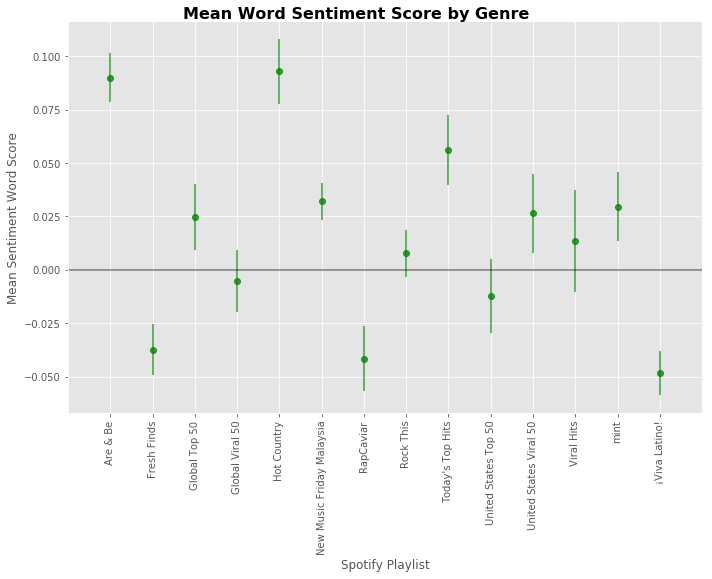

In [50]:
# Visualize
fig, ax = plt.subplots(figsize = (10, 8))
fig.suptitle("Mean Word Sentiment Score by Genre", fontsize = 16, fontweight = "bold", y = 1)
plt.style.use('ggplot')
ax.errorbar(np.arange(len(means)),
            visual['mean'],
            visual['sem'],
            fmt = "o",
            color = "green",
            alpha = .75)
ax.set_xlim(-1, len(means))
ax.set_xlabel("Spotify Playlist")
ax.set_ylabel("Mean Sentiment Word Score")

plt.hlines(0, -1, len(means), alpha = .5)
plt.xticks(np.arange(len(means)),
           visual.index.tolist(),
           rotation = 90)
plt.tight_layout()
plt.savefig("./Images/Mean_Word_Sent.png")
plt.show()

In [29]:
# Make a data frame for use in graphing
visual = pd.merge(means, sem, on = "Playlist")
visual = visual[["Popularity_x", "Popularity_y"]]
visual = visual.rename(columns = {"Popularity_x": "mean",
                                  "Popularity_y": "sem"})

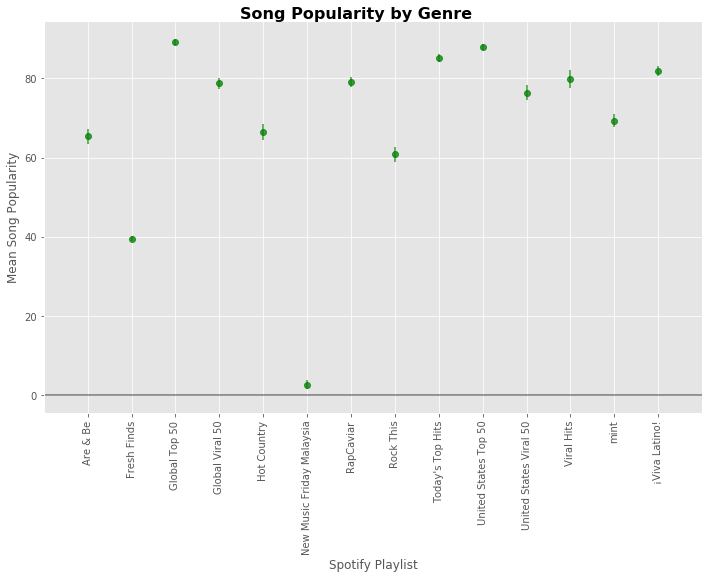

In [45]:
# Visualize
fig, ax = plt.subplots(figsize = (10, 8))
fig.suptitle("Song Popularity by Genre", fontsize = 16, fontweight = "bold", y = 1)
plt.style.use('ggplot')
ax.errorbar(np.arange(len(means)),
            visual['mean'],
            visual['sem'],
            fmt = "o",
            color = "g",
            alpha = .75)
ax.set_xlim(-1, len(means))
#ax.set_ylim(, 100)
ax.set_xlabel("Spotify Playlist")
ax.set_ylabel("Mean Song Popularity")

plt.hlines(0, -1, len(means), alpha = .5)
plt.xticks(np.arange(len(means)),
           visual.index.tolist(),
           rotation = 90)
plt.tight_layout()
plt.savefig("./Images/Song_Popularity_by_Genre.png")

In [15]:
# Loop through all playlists and create a dictionary of linear regression values for Popularity
regression_dic_p = {}
for playlist in pd.unique(sentiment_df['Playlist']):
    compound = sentiment_df.loc[sentiment_df["Playlist"] == playlist, "compound"]
    compound = compound.astype(float)
    popularity = sentiment_df.loc[sentiment_df["Playlist"] == playlist, "Popularity"]
    
    # Perform linear regression
    (slope, intercept, _, _, _) = linregress(compound, popularity)
    fit = slope * compound + intercept
    
    # Store values to dictionary
    regression = {'slope': slope,
                  'intercept': intercept,
                  'fit': fit}
    regression_dic_p[playlist] = regression

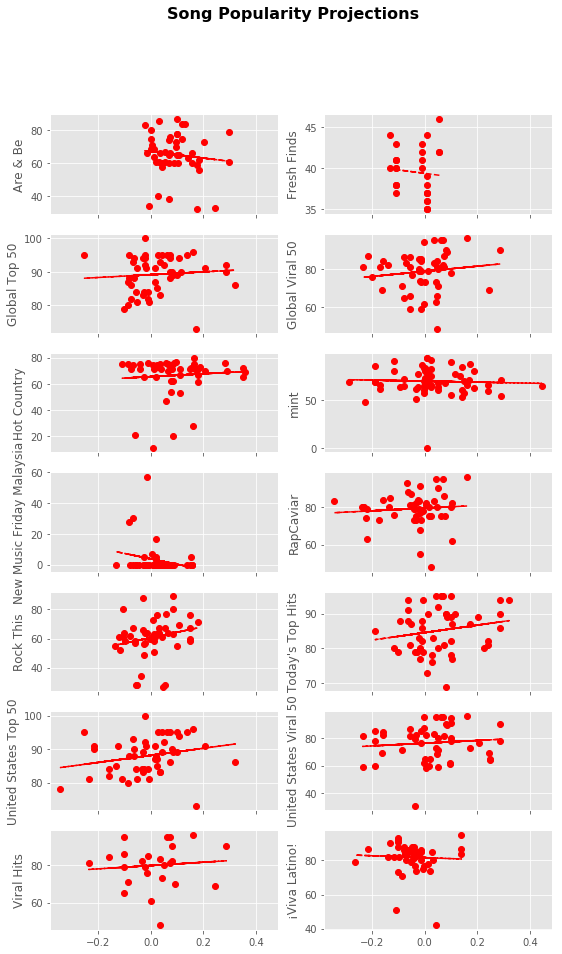

In [52]:
# Create the plot
fig, axes = plt.subplots(ncols=2, nrows=7, sharex = True, figsize = (9, 15))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14 = axes.ravel()

fig.suptitle("Song Popularity Projections", fontsize = 16, fontweight = "bold")
plt.style.use('ggplot')

# Are & Be
sent_data = sentiment_df.loc[sentiment_df["Playlist"] == "Are & Be", "compound"].astype(float)
pop_data = sentiment_df.loc[sentiment_df["Playlist"] == "Are & Be", "Popularity"]
#ax1.set_xlim(min(sent_data), max(sent_data))
ax1.plot(sent_data, pop_data, color='red', linewidth=0, marker='o')
ax1.plot(sent_data, regression_dic_p["Are & Be"]['fit'], 'r--')
ax1.set_ylabel("Are & Be")

# Fresh Finds
sent_data = sentiment_df.loc[sentiment_df["Playlist"] == "Fresh Finds", "compound"].astype(float)
pop_data = sentiment_df.loc[sentiment_df["Playlist"] == "Fresh Finds", "Popularity"]
ax2.plot(sent_data, pop_data, color='red', linewidth=0, marker='o')
ax2.plot(sent_data, regression_dic_p["Fresh Finds"]['fit'], 'r--')
ax2.set_ylabel("Fresh Finds")

# Global Top 50
sent_data = sentiment_df.loc[sentiment_df["Playlist"] == "Global Top 50", "compound"].astype(float)
pop_data = sentiment_df.loc[sentiment_df["Playlist"] == "Global Top 50", "Popularity"]
ax3.plot(sent_data, pop_data, color='red', linewidth=0, marker='o')
ax3.plot(sent_data, regression_dic_p["Global Top 50"]['fit'], 'r--')
ax3.set_ylabel("Global Top 50")

# Global Viral 50
sent_data = sentiment_df.loc[sentiment_df["Playlist"] == "Global Viral 50", "compound"].astype(float)
pop_data = sentiment_df.loc[sentiment_df["Playlist"] == "Global Viral 50", "Popularity"]
ax4.plot(sent_data, pop_data, color='red', linewidth=0, marker='o')
ax4.plot(sent_data, regression_dic_p["Global Viral 50"]['fit'], 'r--')
ax4.set_ylabel("Global Viral 50")

# Hot Country
sent_data = sentiment_df.loc[sentiment_df["Playlist"] == "Hot Country", "compound"].astype(float)
pop_data = sentiment_df.loc[sentiment_df["Playlist"] == "Hot Country", "Popularity"]
ax5.plot(sent_data, pop_data, color='red', linewidth=0, marker='o')
ax5.plot(sent_data, regression_dic_p["Hot Country"]['fit'], 'r--')
ax5.set_ylabel("Hot Country")

# mint
sent_data = sentiment_df.loc[sentiment_df["Playlist"] == "mint", "compound"].astype(float)
pop_data = sentiment_df.loc[sentiment_df["Playlist"] == "mint", "Popularity"]
ax6.plot(sent_data, pop_data, color='red', linewidth=0, marker='o')
ax6.plot(sent_data, regression_dic_p["mint"]['fit'], 'r--')
ax6.set_ylabel("mint")

# New Music Friday Malaysia
sent_data = sentiment_df.loc[sentiment_df["Playlist"] == "New Music Friday Malaysia", "compound"].astype(float)
pop_data = sentiment_df.loc[sentiment_df["Playlist"] == "New Music Friday Malaysia", "Popularity"]
ax7.plot(sent_data, pop_data, color='red', linewidth=0, marker='o')
ax7.plot(sent_data, regression_dic_p["New Music Friday Malaysia"]['fit'], 'r--')
ax7.set_ylabel("New Music Friday Malaysia")

# RapCaviar
sent_data = sentiment_df.loc[sentiment_df["Playlist"] == "RapCaviar", "compound"].astype(float)
pop_data = sentiment_df.loc[sentiment_df["Playlist"] == "RapCaviar", "Popularity"]
ax8.plot(sent_data, pop_data, color='red', linewidth=0, marker='o')
ax8.plot(sent_data, regression_dic_p["RapCaviar"]['fit'], 'r--')
ax8.set_ylabel("RapCaviar")

# Rock This
sent_data = sentiment_df.loc[sentiment_df["Playlist"] == "Rock This", "compound"].astype(float)
pop_data = sentiment_df.loc[sentiment_df["Playlist"] == "Rock This", "Popularity"]
ax9.plot(sent_data, pop_data, color='red', linewidth=0, marker='o')
ax9.plot(sent_data, regression_dic_p["Rock This"]['fit'], 'r--')
ax9.set_ylabel("Rock This")

# Today's Top Hits
sent_data = sentiment_df.loc[sentiment_df["Playlist"] == "Today's Top Hits", "compound"].astype(float)
pop_data = sentiment_df.loc[sentiment_df["Playlist"] == "Today's Top Hits", "Popularity"]
ax10.plot(sent_data, pop_data, color='red', linewidth=0, marker='o')
ax10.plot(sent_data, regression_dic_p["Today\'s Top Hits"]['fit'], 'r--')
ax10.set_ylabel("Today's Top Hits")

# United States Top 50
sent_data = sentiment_df.loc[sentiment_df["Playlist"] == "United States Top 50", "compound"].astype(float)
pop_data = sentiment_df.loc[sentiment_df["Playlist"] == "United States Top 50", "Popularity"]
ax11.plot(sent_data, pop_data, color='red', linewidth=0, marker='o')
ax11.plot(sent_data, regression_dic_p["United States Top 50"]['fit'], 'r--')
ax11.set_ylabel("United States Top 50")

# United States Viral 50
sent_data = sentiment_df.loc[sentiment_df["Playlist"] == "United States Viral 50", "compound"].astype(float)
pop_data = sentiment_df.loc[sentiment_df["Playlist"] == "United States Viral 50", "Popularity"]
ax12.plot(sent_data, pop_data, color='red', linewidth=0, marker='o')
ax12.plot(sent_data, regression_dic_p["United States Viral 50"]['fit'], 'r--')
ax12.set_ylabel("United States Viral 50")

# Viral Hits
sent_data = sentiment_df.loc[sentiment_df["Playlist"] == "Viral Hits", "compound"].astype(float)
pop_data = sentiment_df.loc[sentiment_df["Playlist"] == "Viral Hits", "Popularity"]
ax13.plot(sent_data, pop_data, color='red', linewidth=0, marker='o')
ax13.plot(sent_data, regression_dic_p["Viral Hits"]['fit'], 'r--')
ax13.set_ylabel("Viral Hits")

# ¡Viva Latino!
sent_data = sentiment_df.loc[sentiment_df["Playlist"] == "¡Viva Latino!", "compound"].astype(float)
pop_data = sentiment_df.loc[sentiment_df["Playlist"] == "¡Viva Latino!", "Popularity"]
ax14.plot(sent_data, pop_data, color='red', linewidth=0, marker='o')
ax14.plot(sent_data, regression_dic_p["¡Viva Latino!"]['fit'], 'r--')
ax14.set_ylabel("¡Viva Latino!")

plt.show()

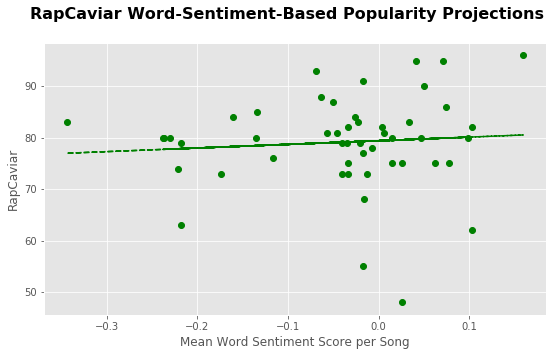

In [57]:
# Create the plot
fig, ax = plt.subplots(figsize = (9, 5))
fig.suptitle("RapCaviar Word-Sentiment-Based Popularity Projections", fontsize = 16, fontweight = "bold")
plt.style.use('ggplot')

# RapCaviar
sent_data = sentiment_df.loc[sentiment_df["Playlist"] == "RapCaviar", "compound"].astype(float)
pop_data = sentiment_df.loc[sentiment_df["Playlist"] == "RapCaviar", "Popularity"]
ax.plot(sent_data, pop_data, color='green', linewidth=0, marker='o')
ax.plot(sent_data, regression_dic_p["RapCaviar"]['fit'], 'g--')
ax.set_ylabel("RapCaviar")
ax.set_xlabel("Mean Word Sentiment Score per Song")
plt.savefig("./Images/RapCaviar_WordSent.png")
plt.show()

In [ ]:
# Boxplot
sentiment_df.boxplot("compound", by="Playlist", figsize=(20, 10))

In [51]:
# Perform ANOVA for word sentiment scores
f_oneway(sentiment_df.loc[sentiment_df["Playlist"] == "Are & Be", "compound"],
         sentiment_df.loc[sentiment_df["Playlist"] == "Fresh Finds", "compound"],
         sentiment_df.loc[sentiment_df["Playlist"] == "Global Top 50", "compound"],
         sentiment_df.loc[sentiment_df["Playlist"] == "Global Viral 50", "compound"],
         sentiment_df.loc[sentiment_df["Playlist"] == "Hot Country", "compound"],
         sentiment_df.loc[sentiment_df["Playlist"] == "mint", "compound"],
         sentiment_df.loc[sentiment_df["Playlist"] == "New Music Friday Malaysia", "compound"],
         sentiment_df.loc[sentiment_df["Playlist"] == "RapCaviar", "compound"],
         sentiment_df.loc[sentiment_df["Playlist"] == "Rock This", "compound"],
         sentiment_df.loc[sentiment_df["Playlist"] == "Today's Top Hits", "compound"],
         sentiment_df.loc[sentiment_df["Playlist"] == "United States Top 50", "compound"],
         sentiment_df.loc[sentiment_df["Playlist"] == "United States Viral 50", "compound"],
         sentiment_df.loc[sentiment_df["Playlist"] == "Viral Hits", "compound"],
         sentiment_df.loc[sentiment_df["Playlist"] == "¡Viva Latino!", "compound"])

F_onewayResult(statistic=8.55703820332002, pvalue=3.189494597944752e-16)

In [46]:
# Perform ANOVA for popularity values
f_oneway(sentiment_df.loc[sentiment_df["Playlist"] == "Are & Be", "Popularity"],
         sentiment_df.loc[sentiment_df["Playlist"] == "Fresh Finds", "Popularity"],
         sentiment_df.loc[sentiment_df["Playlist"] == "Global Top 50", "Popularity"],
         sentiment_df.loc[sentiment_df["Playlist"] == "Global Viral 50", "Popularity"],
         sentiment_df.loc[sentiment_df["Playlist"] == "Hot Country", "Popularity"],
         sentiment_df.loc[sentiment_df["Playlist"] == "mint", "Popularity"],
         sentiment_df.loc[sentiment_df["Playlist"] == "New Music Friday Malaysia", "Popularity"],
         sentiment_df.loc[sentiment_df["Playlist"] == "RapCaviar", "Popularity"],
         sentiment_df.loc[sentiment_df["Playlist"] == "Rock This", "Popularity"],
         sentiment_df.loc[sentiment_df["Playlist"] == "Today's Top Hits", "Popularity"],
         sentiment_df.loc[sentiment_df["Playlist"] == "United States Top 50", "Popularity"],
         sentiment_df.loc[sentiment_df["Playlist"] == "United States Viral 50", "Popularity"],
         sentiment_df.loc[sentiment_df["Playlist"] == "Viral Hits", "Popularity"],
         sentiment_df.loc[sentiment_df["Playlist"] == "¡Viva Latino!", "Popularity"])

F_onewayResult(statistic=243.67463678217123, pvalue=1.7718073851146072e-242)